# Convolutional Neural Networks in PyTorch

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 8)

## Convolution operator
- Problems with the Fully-connected nn
    - Do you need to consider all the relations between the features?
    - Fully connected nn are big and so very computationally inefficient
    - They have so many parameters, and so overfit
- Main idea of CNN
    - Units are connected with only a few units from the previous layer
    - Units share weights


![convolution](https://github.com/goodboychan/chans_jupyter/blob/main/_notebooks/image/convolutions.png?raw=1)
- Convolving operation


![convolution2](https://github.com/goodboychan/chans_jupyter/blob/main/_notebooks/image/convolution2.png?raw=1)
- Activation map


![act](https://github.com/goodboychan/chans_jupyter/blob/main/_notebooks/image/act_map.png?raw=1)

### Pooling operators
- Max-Pooling


![maxpool](https://github.com/goodboychan/chans_jupyter/blob/main/_notebooks/image/maxpool.png?raw=1)


- Average-Pooling


![avgpool](https://github.com/goodboychan/chans_jupyter/blob/main/_notebooks/image/avgpool.png?raw=1)

### Max-pooling operator

In [ ]:
im = torch.rand(1, 1, 6, 6)
im

tensor([[[[0.2606, 0.8885, 0.9520, 0.8289, 0.9327, 0.8139],
          [0.1067, 0.1504, 0.3078, 0.2092, 0.5026, 0.7965],
          [0.3617, 0.7931, 0.1132, 0.3142, 0.4449, 0.1816],
          [0.0971, 0.7477, 0.7394, 0.2645, 0.5462, 0.5243],
          [0.4350, 0.2816, 0.4062, 0.4204, 0.6851, 0.5628],
          [0.6738, 0.3181, 0.9762, 0.5171, 0.8584, 0.9226]]]])

In [ ]:
# Build a pooling operator with size 2
max_pooling = nn.MaxPool2d(2)

# Use pooling operator in the image
output_feature_F = F.max_pool2d(im, 2)

# Print the results
print(output_feature_F)

tensor([[[[0.8885, 0.9520, 0.9327],
          [0.7931, 0.7394, 0.5462],
          [0.6738, 0.9762, 0.9226]]]])


### Average-pooling operator


In [ ]:
# Build a pooling operator with size 2
avg_pooling = nn.AvgPool2d(2)

# Use pooling operator in the image
output_feature_F = F.avg_pool2d(im, 2)

# Print the results
print(output_feature_F)

tensor([[[[0.3515, 0.5745, 0.7614],
          [0.4999, 0.3579, 0.4243],
          [0.4271, 0.5800, 0.7572]]]])


## Convolutional Neural Networks
- AlexNet

![alexnet](https://github.com/goodboychan/chans_jupyter/blob/main/_notebooks/image/alexnet.png?raw=1)


- Implementation in pytorch
```python
class AlexNet(nn.Module):
    def __init__(self, num_classes=1000):
        super(AlexNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2)
        self.conv2 = nn.Conv2d(64, 192, kernel_size=5, padding=2)
        self.conv3 = nn.Conv2d(192, 384, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(384, 256, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.fc1 = nn.Linear(256 * 6 * 6, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, num_classes)
        
    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.maxpool(x)
        x = self.relu(self.conv2(x))
        x = self.maxpool(x)
        x = self.relu(self.conv3(x))
        x = self.relu(self.conv4(x))
        x = self.relu(self.conv5(x))
        x = self.maxpool(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)
```

In [ ]:
class MyCNN(nn.Module):
    def __init__(self):
        super(MyCNN, self).__init__()

        # Instantiate two convolutional layers, use a kernel_size of 3, and padding of 1 (to preserve image dimensions), choose whatever out_channels you want
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3, padding=1)

        # Instantiate the ReLU nonlinearity
        self.relu = nn.ReLU(inplace=True)

        # Instantiate a max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Instantiate a fully connected layer
        self.fc = nn.Linear(7*7*10, 10)

    def forward(self, x):
        # Apply conv followed by relu, then in next line pool
        x = self.relu(self.conv1(x))
        x = self.pool(x)

        # Apply conv followed by relu, then in next line pool
        x = self.relu(self.conv2(x))
        x = self.pool(x)

        # Prepare the image for the fully connected layer
        x = x.flatten(start_dim=1)

        # Apply the fully connected layer and return the result
        return self.fc(x)

### Build your CNN
We're going to use the MNIST dataset as the dataset, which is made of handwritten digits from 0 to 9. The convolutional neural network is going to have 2 convolutional layers, each followed by a ReLU nonlinearity, and a fully connected layer. Remember that each pooling layer halves both the height and the width of the image, so by using 2 pooling layers, the height and width are 1/4 of the original sizes. MNIST images have shape (1, 28, 28), which means finaly image dimensions will be 7x7 (important information for getting the number of parameters right for the fully connected layer)

In [ ]:
class MyCNN(nn.Module):
    def __init__(self):
        super(MyCNN, self).__init__()

        # Instantiate two convolutional layers, use a kernel_size of 3, and padding of 1 (to preserve image dimensions), choose whatever out_channels you want
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3, padding=1)

        # Instantiate the ReLU nonlinearity
        self.relu = nn.ReLU(inplace=True)

        # Instantiate a max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Instantiate a fully connected layer
        self.fc = nn.Linear(7*7*10, 10)

    def forward(self, x):
        # Apply conv followed by relu, then in next line pool
        x = self.relu(self.conv1(x))
        x = self.pool(x)

        # Apply conv followed by relu, then in next line pool
        x = self.relu(self.conv2(x))
        x = self.pool(x)

        # Prepare the image for the fully connected layer
        x = x.flatten(start_dim=1)

        # Apply the fully connected layer and return the result
        return self.fc(x)

## Training Convolutional Neural Networks

---

### Training CNNs
Now we will train the CNN. Transforms and datasets have been prepared for you, but you will have to prepare the dataloaders yourself. Refer back to last week's notebook if you don't remember how.
Initialize the optimizer (Adam) and the loss function (cross-entropy) too.


In [ ]:
import torchvision.transforms as transforms

# Transform the data to torch tensors and normalize it
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307), (0.3081))
])

# Preparing the training and test set
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)

In [ ]:
# Prepare loader, pass in variable batch_size for the batch_size argument, don't hardcode a value
batch_size = 16
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [ ]:
import torch.optim as optim
model = MyCNN()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device) #move model to GPU
print(device) #if you're not on GPU make sure to switch runtime to GPU (COLAB)

cpu


In [ ]:
for epoch in range(10):
    train_running_loss = 0.0
    model = model.train()

    ## training step
    for i, (images, labels) in enumerate(train_loader):

        #move images and labels to device
        images = images.to(device)
        labels = labels.to(device)

        ## forwardprop + backprop + loss
        predictions = model(images)
        loss = criterion(predictions, labels)
        optimizer.zero_grad()
        loss.backward()



        ## update model params (step optimizer)
        optimizer.step()

        train_running_loss += loss.detach().item()

    #model.eval()
    print('Epoch: %d | Loss: %.4f' \
          %(epoch, train_running_loss/len(train_loader)))

Epoch: 0 | Loss: 0.1783
Epoch: 1 | Loss: 0.0726
Epoch: 2 | Loss: 0.0567
Epoch: 3 | Loss: 0.0491
Epoch: 4 | Loss: 0.0425
Epoch: 5 | Loss: 0.0394
Epoch: 6 | Loss: 0.0361
Epoch: 7 | Loss: 0.0326
Epoch: 8 | Loss: 0.0313
Epoch: 9 | Loss: 0.0292


In [ ]:
model.eval()
correct = 0
# Iterate over the data in the test_loader
for i, data in enumerate(test_loader):
    # Get the image and label from data
    images, labels = data

    #move images and labels to device
    images = images.to(device)

    # Make a forward pass in the net with your image
    output = model(images)

    # Argmax the results of the net
    _, predicted = torch.max(output.data, 1)

    #Iterate through predicted and actual labels and count how many are correct
    predicted = predicted.cpu()
    for i in range(labels.size(0)):
      if predicted[i] == labels[i]:
        correct+=1

total_imgs = len(test_loader)*batch_size
acc = (correct/total_imgs)*100
print(f"Accuracy: {correct}/{total_imgs} = {acc:.2f}%")

Accuracy: 9848/10000 = 98.48%


## Our Alzheimer's Dataset

The dataset we will work with as part of this project is found here on Kaggle https://www.kaggle.com/datasets/lukechugh/best-alzheimer-mri-dataset-99-accuracy/data.
It consists or MRI Brain Scans split into 4 categories of No impairment, very mild impairment, mild impairment, and moderate impairment.

Let's get a quick look at what our images and labels are looking like

Found classes: ['Mild Impairment', 'Moderate Impairment', 'No Impairment', 'Very Mild Impairment']
  Mild Impairment: 2560
  Moderate Impairment: 2560
  No Impairment: 2560
  Very Mild Impairment: 2560


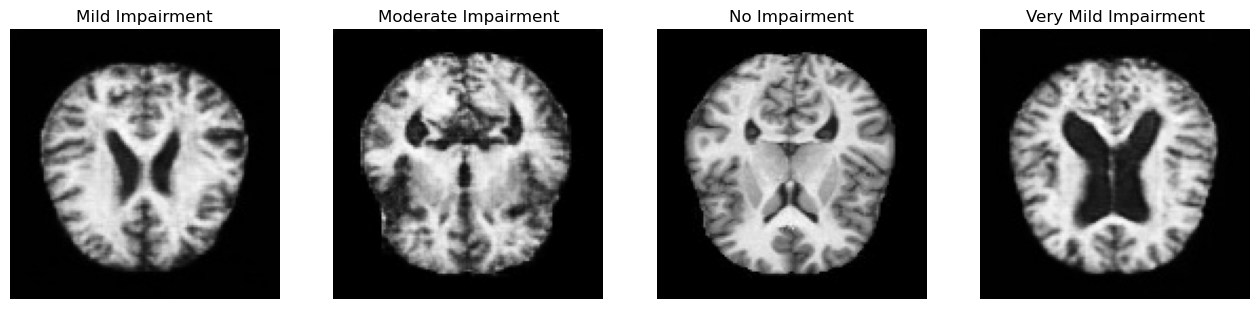

In [ ]:
import os, glob, random
import matplotlib.pyplot as plt

data_dir = "train"

classes = sorted([d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))])
print('Found classes:', classes)
counts = {c: len(glob.glob(os.path.join(data_dir, c, '*'))) for c in classes}
for k,v in counts.items():
    print(f'  {k}: {v}')
sample_imgs = []

for c in classes:
    imgs = glob.glob(os.path.join(data_dir, c, '*'))
    if imgs:
        sample_imgs.append((c, random.choice(imgs)))
if sample_imgs:
    fig, axs = plt.subplots(1, len(sample_imgs), figsize=(4*len(sample_imgs),4))
    if len(sample_imgs)==1:
        axs=[axs]
    for ax,(c,p) in zip(axs, sample_imgs):
        img = plt.imread(p)
        ax.imshow(img, cmap='gray' if img.ndim==2 else None)
        ax.set_title(c)
        ax.axis('off')
    plt.show()

Start by defining a transform that we will use, in this case we just want a consistent size as well as cropping

In [ ]:
standard_transform = torchvision.transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(256),
    transforms.ToTensor(),

])

Then we want to create train and test loaders

In [ ]:

train_dir = "train"
test_dir = "test"

train_dataset = torchvision.datasets.ImageFolder(root=train_dir, transform=standard_transform)
test_dataset = torchvision.datasets.ImageFolder(root=test_dir, transform=standard_transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

Now Let's Define a New CNN Architecture for this Dataset, keep in mind there are only 4 potential classifications now feel free to tweak it until you are happy with the results of your model

In [ ]:
class MyAlzheimerCNN(nn.Module):
    def __init__(self):
        super(MyAlzheimerCNN, self).__init__()


        self.conv1 = nn.Conv2d(in_channels=3, out_channels=5, kernel_size=3,padding=1)
        self.conv2 = nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3,padding=1)
        # Instantiate the ReLU nonlinearity
        self.relu = nn.ReLU(inplace=True)

        # Instantiate a max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Instantiate a fully connected layer
        #256 / 2 / 2 * 256 / 2 / 2 * 10
        self.fc = nn.Linear(64*64*10, 4)

    def forward(self, x):
        # Apply conv followed by relu, then in next line pool
        x = self.relu(self.conv1(x))
        x = self.pool(x)

        # Apply conv followed by relu, then in next line pool
        x = self.relu(self.conv2(x))
        x = self.pool(x)

        # Prepare the image for the fully connected layer
        x = x.flatten(start_dim=1)

        # Apply the fully connected layer and return the result
        return self.fc(x)

And Finally Train and Evaluate the model, try to see how high you can get the accuracy!

In [ ]:
model = MyAlzheimerCNN()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device) #move model to GPU
print(device) #if you're not on GPU make sure to switch runtime to GPU (COLAB)

cpu


In [ ]:
for epoch in range(2):
    train_running_loss = 0.0
    model = model.train()

    ## training step
    for i, (images, labels) in enumerate(train_loader):

        #move images and labels to device
        images = images.to(device)
        labels = labels.to(device)

        ## forwardprop + backprop + loss
        predictions = model(images)
        loss = criterion(predictions, labels)
        optimizer.zero_grad()
        loss.backward()



        ## update model params (step optimizer)
        optimizer.step()

        train_running_loss += loss.detach().item()

    #model.eval()
    print('Epoch: %d | Loss: %.4f' \
          %(epoch, train_running_loss/len(train_loader)))

Epoch: 0 | Loss: 0.3914
Epoch: 1 | Loss: 0.2329


In [ ]:
model.eval()
correct = 0
total = 0

with torch.no_grad():  # Disable gradients for evaluation
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

acc = (correct / total) * 100
print(f"Accuracy: {correct}/{total} = {acc:.2f}%")


Accuracy: 1102/1279 = 86.16%
